# Python Task Optimisation and Interoperability - Subprocess Module

### Definition

"The subprocess module allows you to spawn new processes, connect to their input/output/error pipes, and obtain their return codes."

### Functions
* __run__:  Run the command described by args. Wait for command to complete, then return a CompletedProcess instance.[1](https://docs.python.org/3/library/subprocess.html#subprocess.run)
* __check_output__: Run command with arguments and return its output. [2](https://docs.python.org/3/library/subprocess.html#subprocess.check_output)
* _peopen_: Execute a child program in a new process. [3](https://docs.python.org/3/library/subprocess.html#subprocess.Popen)


### Shell commands Recap

* __ls__: List information about files in a certain directory
* __du -sh__: Calculates size of a directory
* __find . ! -name 'file.txt' -type f -exec rm -f {} +__: Remove all files in current directory except for "file.txt"

### Task
Remove all unnecessary files from a specific folder recursively except for structure (.pdb) and sequence (.fasta) files.

Structure files are defined as:
[four-letter-code] _ chain _ [one-letter-code].pdb - 1u9a_chain_A.pdb

Sequence files are defined as:
[four-letter-code] _ chain _ [one-letter-code].fasta - 1u9a_chain_A.fasta

In [6]:
# IMPORT PACKAGES
import os
import subprocess

# DEFINE CONSTANTS
CURRENT_FOLDER = os.getcwd()
DATA_FOLDER = os.path.join(CURRENT_FOLDER,"data")


def organiser(folder):
    # READS ORIGINAL SIZE OF THE DATA
    original_size = subprocess.check_output(f"du -sh {folder}", shell=True)
    original_size = original_size.decode('ascii')
    
    # LIST ALL FOLDERS IN DATA folder
    output_ls = subprocess.check_output(f"ls {folder}", shell=True)
    # TRANSFORM TEXT OUTPUT FROM output_ls TO A PYTHON LIST
    parsed_output_ls = [item.strip().decode('ascii') for item in output_ls.split()]
    
    # REMOVE ALL FILES EXCEPT FOR FILES WITH THE FOLLOWING NAME PDBCODE_chain_CHAIN.fasta and PDBCODE_chain_CHAIN.pdb
    for entry in parsed_output_ls:
        pdb_code = entry.split("_")[0]
        chain = entry.split("_")[1]    
        subprocess.run(f"find {folder}/{pdb_code}_{chain} ! \\( -name '{pdb_code}_chain_{chain}.fasta' -o -name '{pdb_code}_chain_{chain}.pdb' \\) -type f -exec rm -f {{}} +", shell=True)
    
    # READS SIZE OF folder AFTER REMOVING UNWANTED FILES
    final_size = subprocess.check_output(f"du -sh {folder}", shell=True)
    final_size = final_size.decode('ascii')
   
    
    print(f"Before: {original_size}")
    print(f"After: {final_size}")
    return True
    
organiser(DATA_FOLDER)


Before: 8.2M	/Users/carlos/Documents/resbazapp/data

After: 8.2M	/Users/carlos/Documents/resbazapp/data



True

### Task
Plot sizes for all sub folders.

[Seaborn](https://seaborn.pydata.org/)

[224.0, 277.0, 189.0, 175.0, 194.0, 166.0, 182.0, 190.0, 190.0, 179.0, 313.0, 210.0, 162.0, 178.0, 180.0, 193.0, 164.0, 190.0, 210.0, 174.0, 342.0, 178.0, 153.0, 164.0, 178.0, 178.0, 167.0, 193.0, 179.0, 251.0, 169.0, 188.0, 166.0, 167.0, 170.0, 178.0, 164.0, 164.0, 169.0, 202.0, 179.0, 282.0]


True

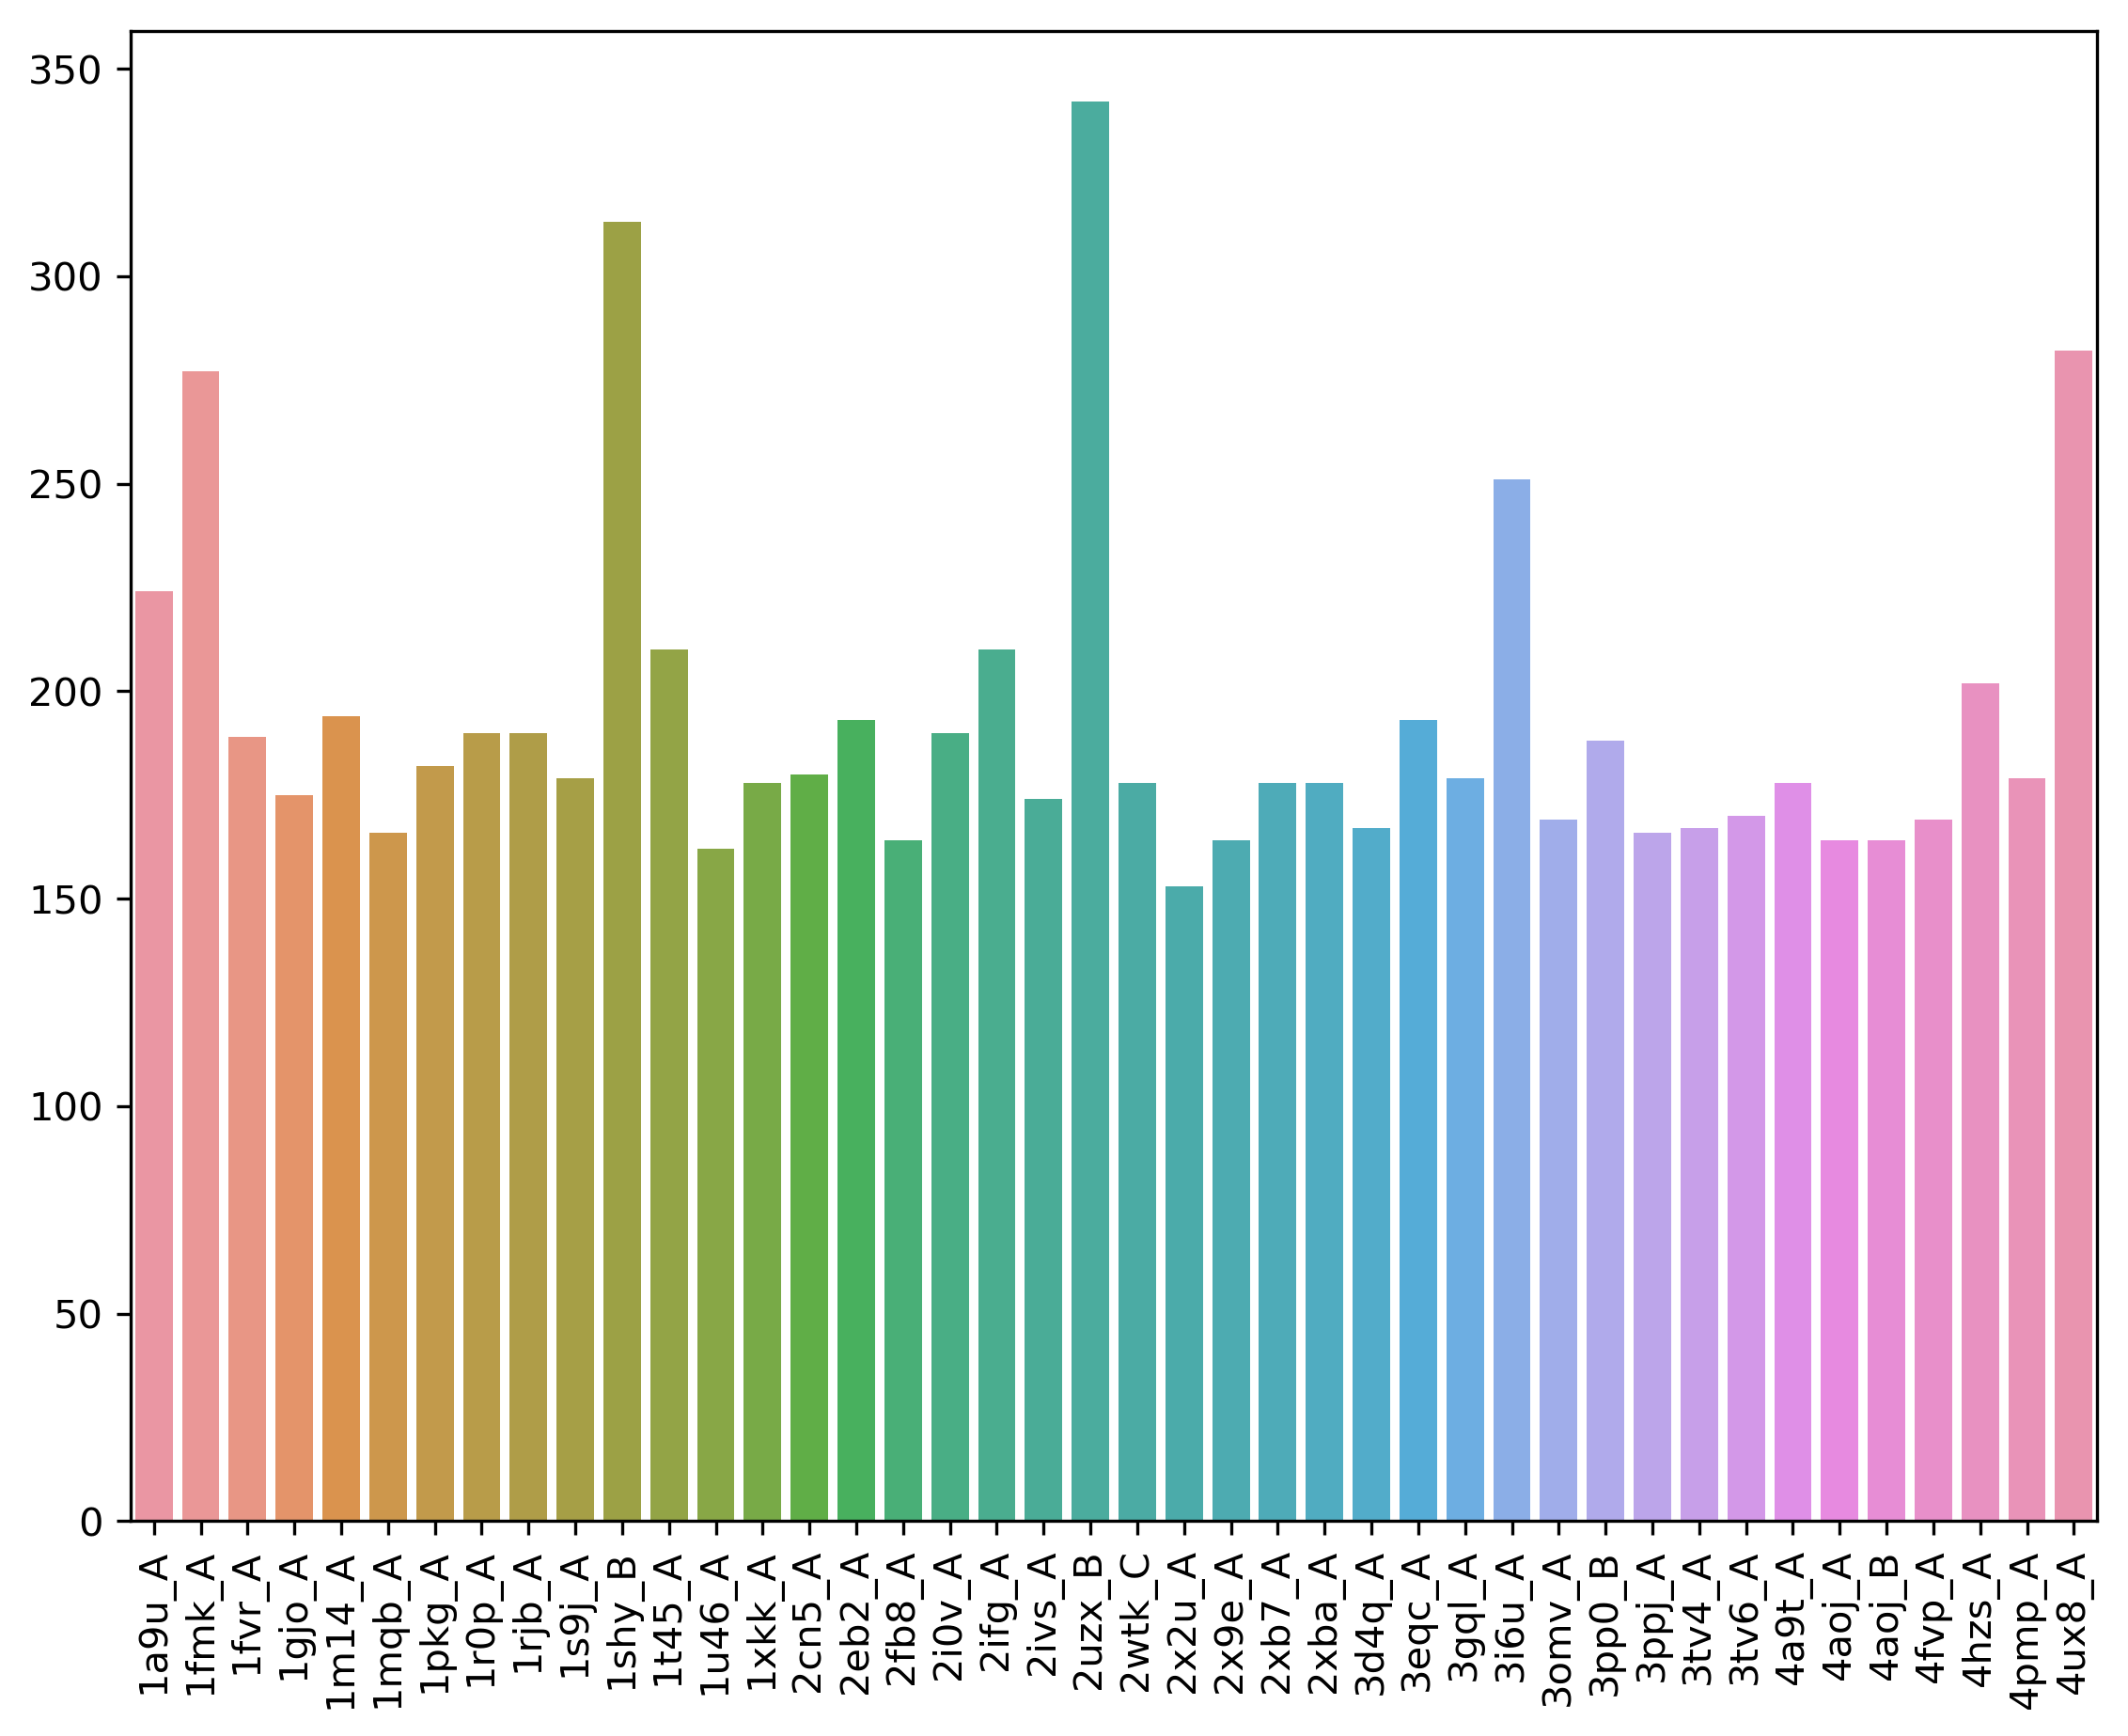

In [12]:
# IMPORT PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data_size(folder):
    # LIST ALL FOLDERS IN DATA folder
    output_ls = subprocess.check_output(f"ls {folder}", shell=True)
    # TRANSFORM TEXT OUTPUT FROM output_ls TO A PYTHON LIST
    parsed_output_ls = [item.strip().decode('ascii') for item in output_ls.split()]
    
    # FOR
    folder_size_dict = dict()
    for entry in parsed_output_ls:
        pdb_code = entry.split("_")[0]
        chain = entry.split("_")[1]
    
        pdb_file = os.path.join(folder,entry,f"{pdb_code}_chain_{chain}.pdb")
        folder_size = subprocess.check_output(f"ls -lh {pdb_file}", shell=True)
        folder_size_dict[entry] = float(folder_size.decode("ascii").split()[4][:-1])
    
    # PLOT FILE SIZES
    plt.figure(figsize=(9,7), dpi=300)
    print(list(folder_size_dict.values()))
    sns.barplot(x=list(folder_size_dict.keys()), y=list(folder_size_dict.values()))
    # ROTATE LABELS ON AXIS X
    plt.xticks(rotation=90)
    return True

plot_data_size(DATA_FOLDER)


### Task

Run R script to calculation the deformation energy of a 3D structure using the following parameters. The script is under the folder __src__.

In [5]:
CURRENT_FOLDER = os.getcwd()
CODE_FOLDER = os.path.join(CURRENT_FOLDER,"src")

def run_deformation(pdb_file, chain, residue_number):
    deformation_energy_score = subprocess.check_output(f"Rscript {CODE_FOLDER}/run_deformation.R {pdb_file} {residue_number} {chain} calpha", shell=True)
    return deformation_energy_score.decode("ascii").split("\n")[-1]

run_deformation("data/1a9u_A/1a9u_chain_A.pdb", "A", 351)

'23.64189'